<a href="https://colab.research.google.com/github/DARoSLab/CS403_2025-Spring/blob/main/Lectures/Lecture_planar_manipulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Lecture - Planar Manipulator**


# The Two-link Planar Manipulator


<img src="https://github.com/DARoSLab/CS403_2025-Spring/blob/main/Figures/2DoF_Arm.png?raw=true" width="400">


In [ ]:
# python libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation
from IPython.display import HTML
from math import pi

# Forward kinematics:
Based on the convention described in the above figure, the following code returns the position of the point C given joint position $q_0$ and $q_1$.


In [ ]:
def forward_kinematics(q, l1=1, l2=1):
  q0, q1 = q
  x = l1*np.cos(q0) + l2*np.cos(q0+q1)
  y = l1*np.sin(q0) + l2*np.sin(q0+q1)
  return np.array([x,y])

In [ ]:
def plot_planar_manipulator(q, l1=1, l2=1, eff_path=None, target=None, interval = 100):
  fig= plt.figure(figsize=(10,10))
  ax = plt.subplot(1,1,1)

  link1, = ax.plot([], [], 'b', lw=10)     # ax.plot returns a list of 2D line objects
  link2, = ax.plot([], [], 'r', lw=10)
  eff, = ax.plot([], [], 'g', marker='o', markersize=15)

  if eff_path is not None:
    ep, = ax.plot(eff_path[:, 0], eff_path[:, 1], 'g-')
  ax.set_xlim(( -2.5, 2.5))
  ax.set_ylim((-2.5, 2.5))
  txt_title = ax.set_title('')

  if target is not None:
    goal, = ax.plot([target[0]], [target[1]], 'r', marker='*', markersize=20)


  def drawFrame(k):
    k = interval*k
    q0, q1 = q[k]

    rA = [0, 0]
    rB = [l1*np.cos(q0), l2*np.sin(q0)]
    rC = forward_kinematics(q[k, :], l1, l2)

    link1.set_data([rA[0], rB[0]], [rA[1], rB[1]])
    link2.set_data([rB[0], rC[0]], [rB[1], rC[1]])
    eff.set_data([rC[0], rC[0]],[rC[1], rC[1]])
    return link1, link2, eff
  anim = animation.FuncAnimation(fig, drawFrame, frames=len(q)//interval, interval=100, blit=True)
  return anim



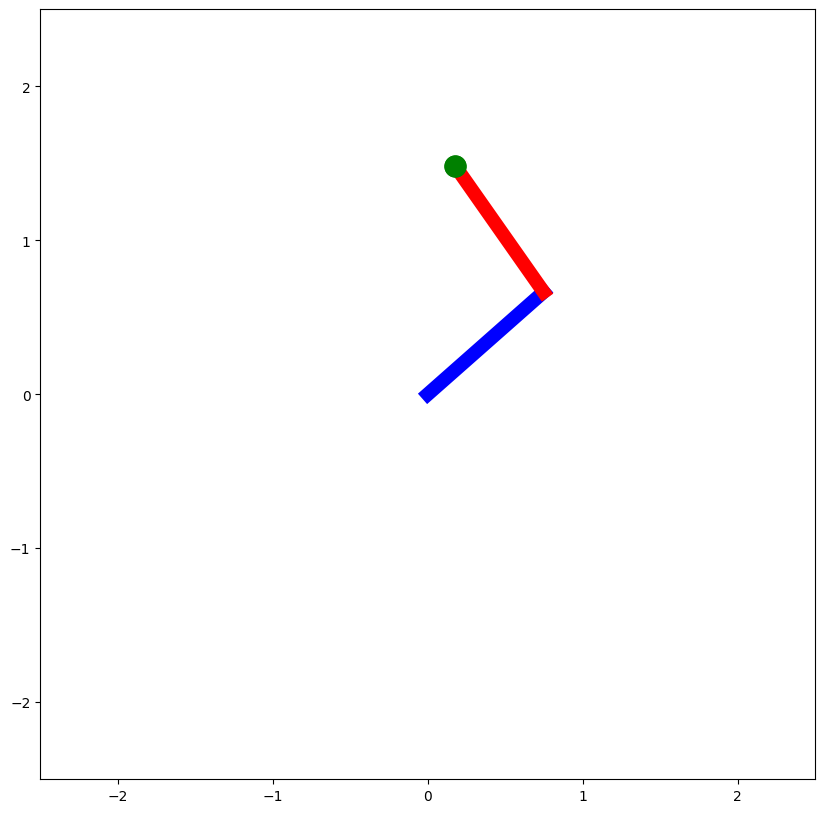

In [ ]:
N = 8000
L1 = 1
L2 = 1
q1 = np.linspace(0, np.pi/4, N)
q2 = np.linspace(0, np.pi/2, N)
q = np.zeros((N, 2))
q[:, 0] = q1
q[:, 1] = q2
anim = plot_planar_manipulator(q, L1, L2)
HTML(anim.to_html5_video())

# Inverse kinematics:
The following inverse kinematics function returns joint position $q_0$ and $q_1$ given the position of point C.

In [ ]:
# Returns a function that can be used to get jacobian at the current state
def get_jacobian(q, l1=1, l2=1):
  # Use these variables and the link lengths in function def
  q0, q1 = q
  J = [[], []]
  J[0] = [-l1*np.sin(q0)-l2*np.sin(q0+q1), -l2*np.sin(q0+q1)]
  J[1] = [l1*np.cos(q0)+l2*np.cos(q0+q1), l2*np.cos(q0+q1)]

  return np.array(J)

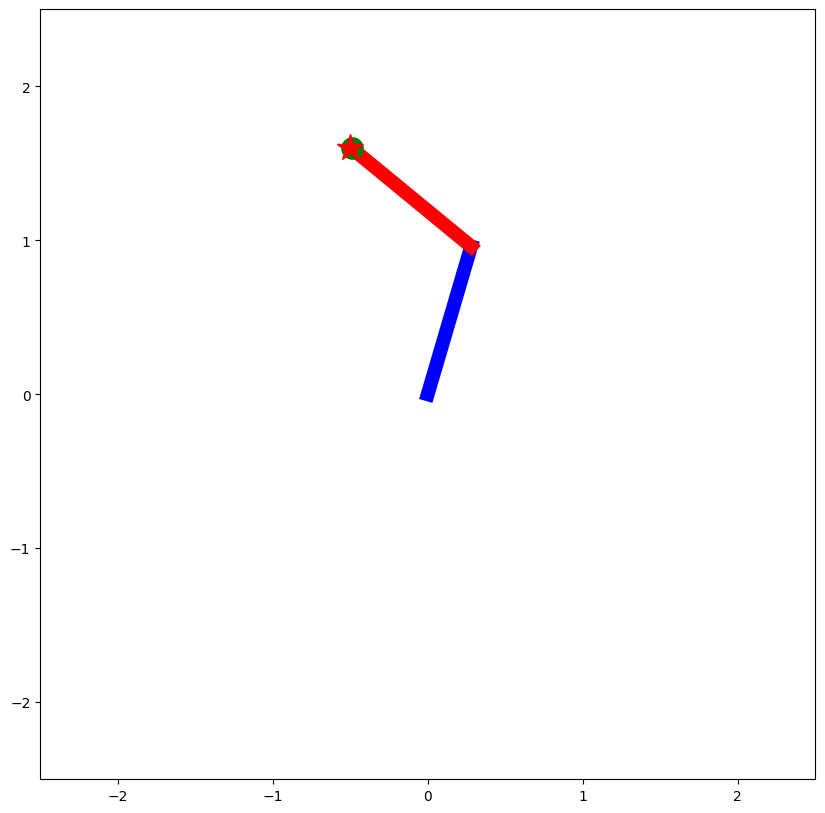

In [ ]:
def newton_IK(x_goal, q_init):
  # array to hold joint position iterations
  q_anim = []

  # Choose an initial guess for joint position,
  q_sol = q_init

  q_anim += [q_sol.copy()]

  # Compute error between goal and current EE position
  d_x = x_goal - forward_kinematics(q_sol) # Your code here

  # Small value at which we stop iterating if the error is smaller
  epsilon = 0.01
  step_size = 0.1
  iter = 0
  # Complete while loop
  while np.linalg.norm(d_x) > epsilon and iter < 100:

    # Get Jacobian at current joint position
    J = get_jacobian(q_sol)

    # Get Jacobian psuedo-inverse
    J_I = np.linalg.pinv(J)

    # Compute change in joint position using corresponding
    #  change in EE position
    d_q = np.matmul(J_I, d_x) # Your answers here

    # Update joint position
    q_sol = q_sol + step_size * d_q # Your answers here


    q_anim += [q_sol.copy()]

    # Update error between goal and current EE position
    d_x = x_goal - forward_kinematics(q_sol) # Your answers here

    iter += 1
  # Returns final joint position and joint data for animation
  return (q_sol, q_anim)



# A test to see if your implementation is correct
x_goal = np.array([-0.5, 1.6])
q_sol, q_anim = newton_IK(x_goal, np.array([0.5, 0.5]))

anim = plot_planar_manipulator(np.array(q_anim), target=x_goal, interval= 1)
HTML(anim.to_html5_video())